PERGUNTAS: 

1. Se a quantidade de mulheres na escola influência o IDH do país
2. Devido a questão anterior, mais mulheres tendo educação, levam elas a ter mais chance de ter um emprego e logo melhorando o iDH?

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#baixando todos os excels
idh = pd.read_excel('hdi_human_development_index.xlsx')
gender_edu = pd.read_excel("ratio_of_girls_to_boys_in_primary_and_secondary_education_perc.xlsx")
employment = pd.read_excel("females_aged_15_24_employment_rate_percent.xlsx")

In [17]:
#pegando as partes que você quer
idh_07 = idh.loc[:,["geo",2007]]
gender_edu_07 = gender_edu.loc[:,["geo",2007]]
employment_07 = employment.loc[:,["geo",2007]]

In [18]:
#ajustando o index
idh_idx = idh_07.set_index("geo")
gender_edu_idx = gender_edu_07.set_index("geo")
employment_idx = employment_07.set_index("geo")

In [19]:
#join 1.0
idh_gender = idh_idx.join(gender_edu_idx, how="inner", lsuffix="_idh", rsuffix="_gender")

In [20]:
idh_gender.head(2)

,2007_idh,2007_gender
geo,,
Afghanistan,0.433,0.570
Albania,0.713,0.982


In [21]:
#join 2.0
data = idh_gender.join(employment_idx, how="inner", lsuffix="_idh", rsuffix="_WomanEmployment")

In [22]:
data.head(2)

,2007_idh,2007_gender,2007
geo,,,
Afghanistan,0.433,0.570,28.5
Albania,0.713,0.982,31.0


In [23]:
data.to_csv("APA1: junção do employment, gender, idh de 2007.csv")

In [24]:
data.describe()

,2007_idh,2007_gender,2007
count,163.000000,122.000000,165.000000
mean,0.662975,0.968697,35.498788
std,0.168619,0.087009,16.580381
min,0.298000,0.570000,4.400000
25%,0.512000,0.964500,23.500000
50%,0.698000,0.994500,31.500000
75%,0.802000,1.010000,45.600000
max,0.936000,1.120000,74.500000


In [25]:
data = data.dropna(how="any")


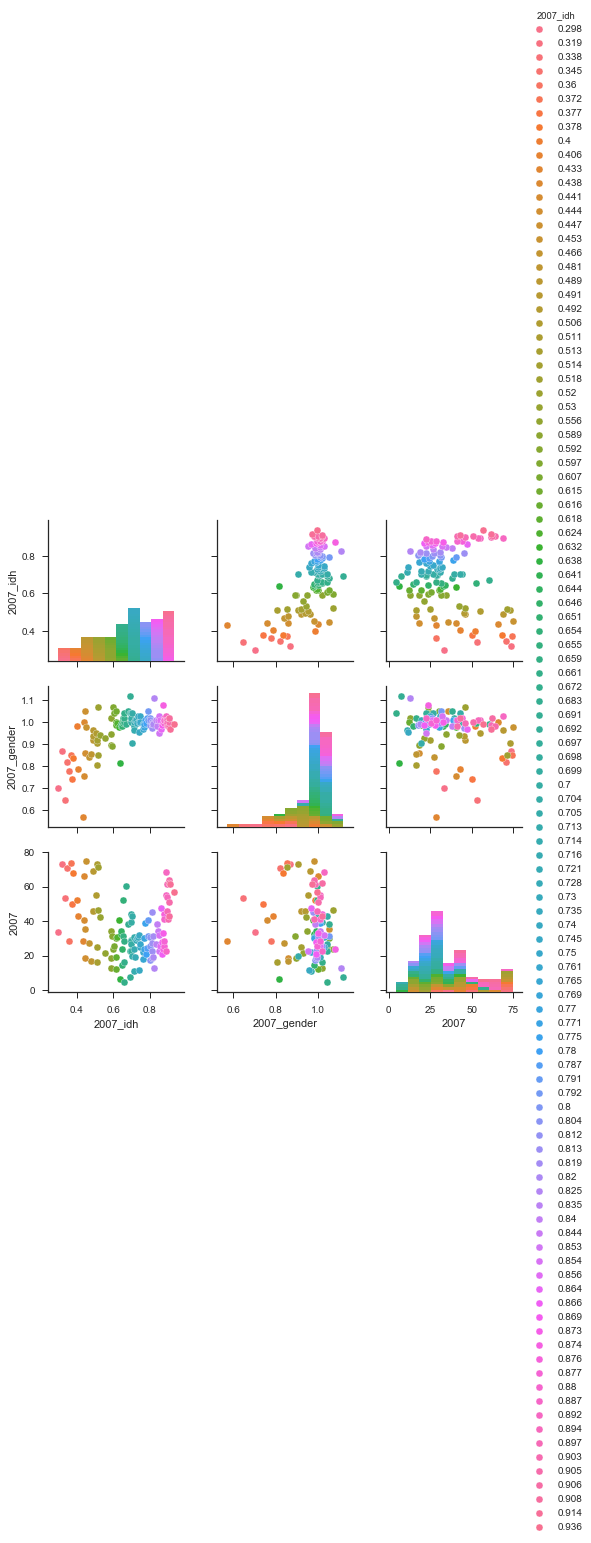

In [26]:
sns.set(style="ticks")

sns.pairplot(data,hue="2007_idh")#, hue="origin")#, x_vars=x_vars, y_vars=y_vars)

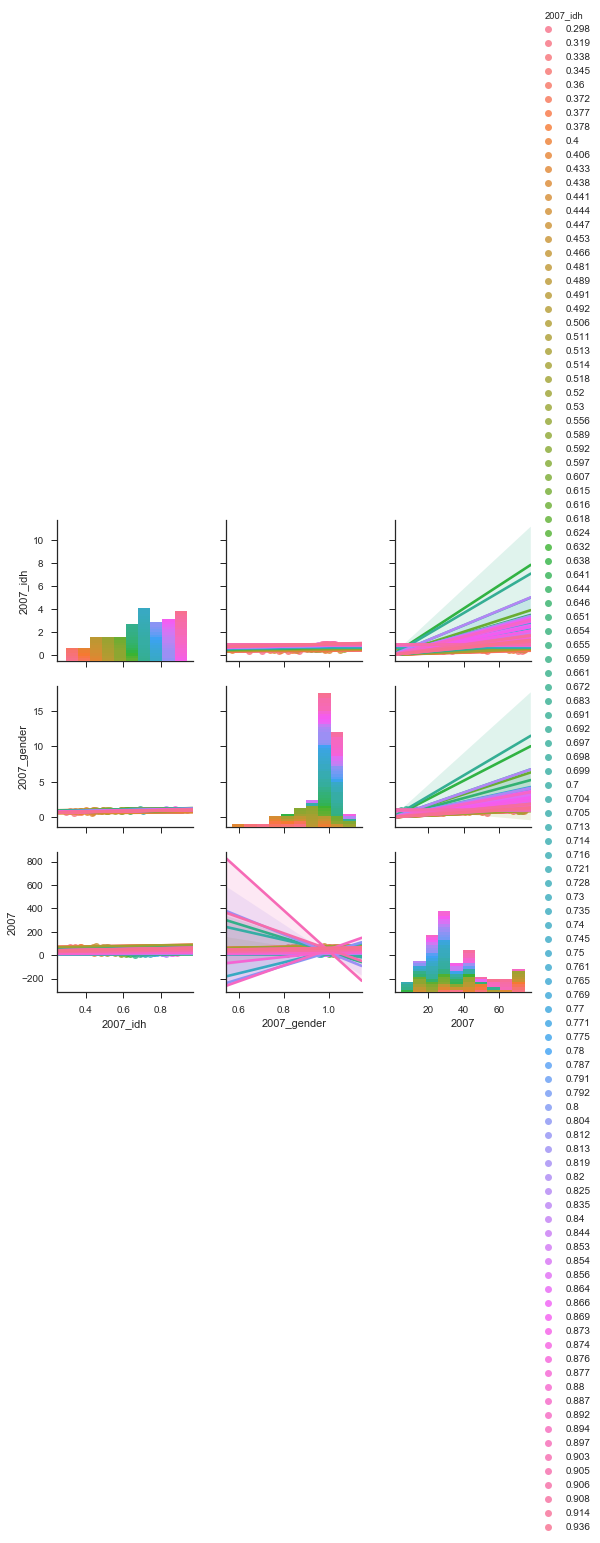

In [27]:
sns.set(style="ticks")

sns.pairplot(data, kind="reg", hue="2007_idh")#

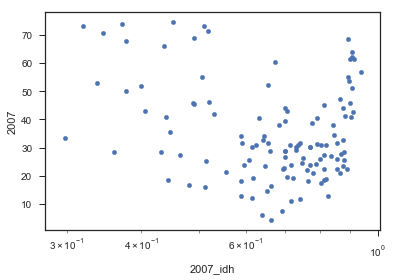

In [28]:
data.plot.scatter(x="2007_idh", y = 2007,  logx=True)

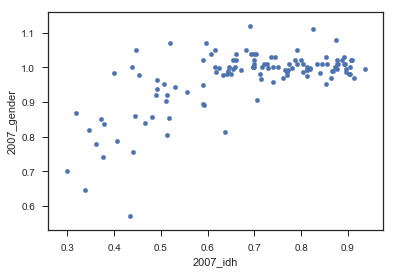

In [29]:
data.plot.scatter(x="2007_idh", y = "2007_gender")

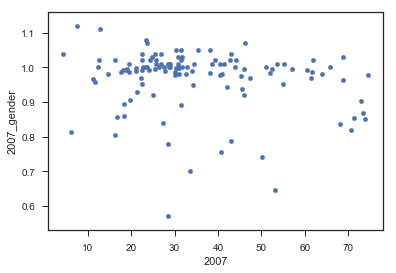

In [30]:
data.plot.scatter(x=2007, y = "2007_gender")

In [31]:
#data["log2007"] = np.log(data[2007])

In [32]:
data.corr()


,2007_idh,2007_gender,2007
2007_idh,1.000000,0.638911,-0.195348
2007_gender,0.638911,1.000000,-0.186105
2007,-0.195348,-0.186105,1.000000


In [33]:
data["2007_idh"].corr(data[2007])

-0.19534838746023162

In [34]:
def reta(data_x, data_y):    
    a = data_y.cov(data_x) / data_x.var()
    b = data_y.mean() - a*data_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(data_x, data_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('IDH em 2007')
    plt.ylabel('employment 2007')

    plt.plot((data_x.min(), data_x.max()), (a*data_x.min()+b, a*data_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()
    

Ajuste linear entre X3 e X4:
Coeficiente linear: 48.4830554020871
Coeficiente angular: -19.737774472874023


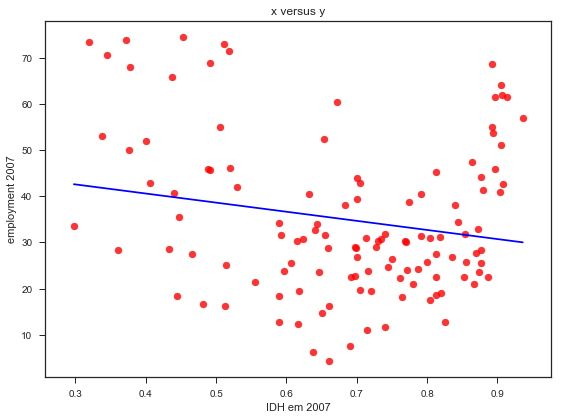

In [35]:
reta( data["2007_idh"],data[2007] )

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.7376979173933023
Coeficiente angular: 0.33691665555983363


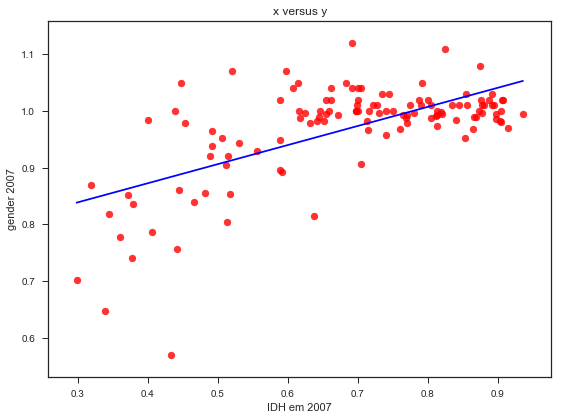

In [36]:
def reta2(data_x, data_y):    
    a = data_y.cov(data_x) / data_x.var()
    b = data_y.mean() - a*data_x.mean()

    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(data_x, data_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('IDH em 2007')
    plt.ylabel('gender 2007')

    plt.plot((data_x.min(), data_x.max()), (a*data_x.min()+b, a*data_x.max()+b), color='blue')

    plt.tight_layout()
    plt.show()
    
reta2( data["2007_idh"],data["2007_gender"] )